In [13]:
#import libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [14]:
#creating custom dataset
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
print(X,y)

[[-1.3474603 ]
 [ 0.3523434 ]
 [ 0.9546986 ]
 [ 0.03592805]
 [ 0.04800625]
 [ 0.04860301]
 [ 0.72334161]
 [ 0.80208661]
 [-1.14379857]
 [ 0.17941071]
 [-0.64770677]
 [-1.11281215]
 [-1.58457724]
 [-0.08798693]
 [ 2.47658416]
 [-0.7322647 ]
 [ 1.54697933]
 [-0.13070464]
 [ 0.30044554]
 [-0.9443686 ]
 [-0.30296397]
 [-0.37444492]
 [-1.15681626]
 [ 0.59857517]
 [-2.37977527]
 [-0.60768369]
 [ 0.54245131]
 [ 2.02240507]
 [ 0.04613557]
 [ 0.52324766]
 [ 0.29714121]
 [-1.54292905]
 [ 1.69235772]
 [ 0.20931349]
 [-0.41830152]
 [ 0.87084178]
 [-1.14747663]
 [-0.17521053]
 [-0.9617768 ]
 [ 0.1886462 ]
 [ 1.20200259]
 [ 1.99008302]
 [-1.36096559]
 [-0.05455871]
 [ 1.16418756]
 [-1.45553433]
 [ 0.01908996]
 [-0.77873992]
 [ 0.03754749]
 [-0.34610187]
 [-0.65122583]
 [ 0.15846954]
 [-1.20894816]
 [-0.64764453]
 [ 0.91484096]
 [-1.84087587]
 [ 0.49995133]
 [ 1.27181862]
 [ 0.69359851]
 [ 0.55618522]
 [ 0.4250724 ]
 [-1.09712188]
 [-0.5648753 ]
 [ 0.35099715]
 [ 0.83783635]
 [ 0.05443274]
 [-0.00936

In [3]:
X.shape

(100, 1)

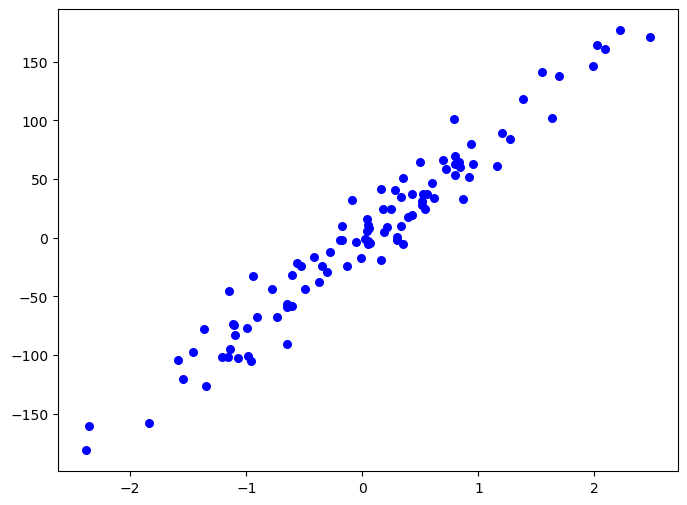

In [15]:
#dataset plotting
fig = plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], y, color = "b", marker = "o", s = 30)
plt.show()

In [5]:
#Linear regression function
class LinearRegression:

    def __init__(self, lr = 0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias

            dw = (1/n_samples) * np.dot(X.T, (y_pred-y))
            db = (1/n_samples) * np.sum(y_pred-y)

            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred

In [6]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [7]:
reg = LinearRegression(lr=0.01)
reg.fit(X_train,y_train)

In [8]:
print(reg.weights)
print(reg.bias)

[75.05642756]
-0.14185705476881272


In [9]:
predictions = reg.predict(X_test)

In [10]:
#loss function
def mse(y_test, predictions):
    return np.mean((y_test-predictions)**2)


In [11]:
mse = mse(y_test, predictions)
print(mse)

305.7719958301902


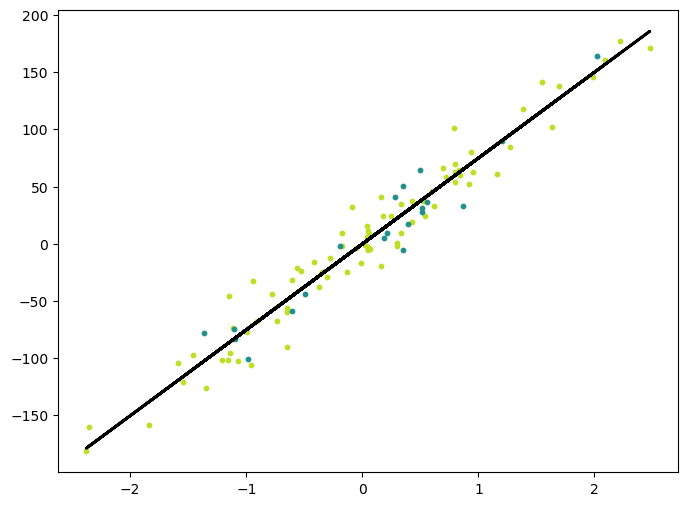

In [12]:
#plotting best fit line
y_pred_line = reg.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color='black', linewidth=2, label='Prediction')
plt.show()